In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go




In [486]:
sasa=pd.read_csv("/Users/Bora/Documents/GitHub/SASA-Hisse-Analizi/SASA.csv")
sasa.index=pd.to_datetime(sasa["Date"])


In [487]:
del sasa["Date"]

In [488]:
sasa=pd.DataFrame(sasa)

In [489]:
close=pd.DataFrame(sasa["Price"])

close

,Price
Date,
2018-01-02,0.938
2018-01-03,0.957
2018-01-04,0.948
2018-01-05,0.962
2018-01-08,0.983
...,...
2023-06-12,62.600
2023-06-13,56.350
2023-06-14,54.950


In [566]:
rolling_app5=close.rolling(window=5).mean()
rolling_app14=close.rolling(window=14).mean()
rolling_app21=close.rolling(window=21).mean()



In [567]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [568]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2018-01-30,0.923,0.9394,0.948143,0.951619
2018-01-31,0.903,0.9288,0.942857,0.949952
2018-02-01,0.889,0.9182,0.937500,0.946714
2018-02-02,0.870,0.9054,0.935786,0.943000
2018-02-05,0.866,0.8902,0.928214,0.938429
...,...,...,...,...
2023-06-12,62.600,65.3400,58.165714,53.526619
2023-06-13,56.350,63.3400,58.572857,54.230667
2023-06-14,54.950,61.0700,59.025000,54.900143


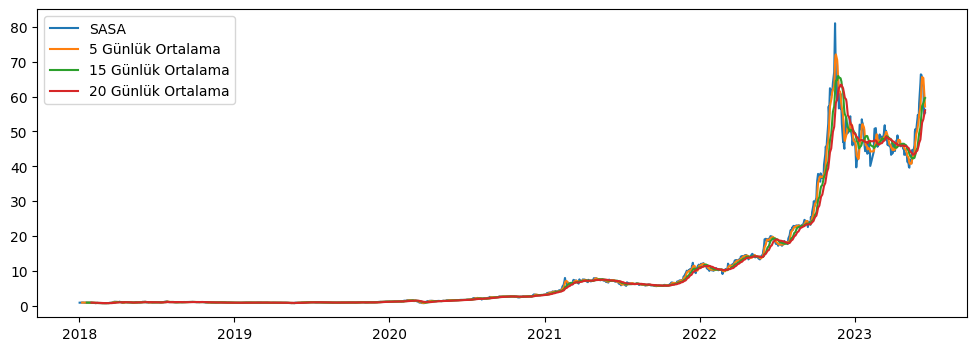

In [569]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='SASA')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='15 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='20 Günlük Ortalama')
ax.legend(loc='upper left')


In [570]:
def buy_sell(data,perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [571]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

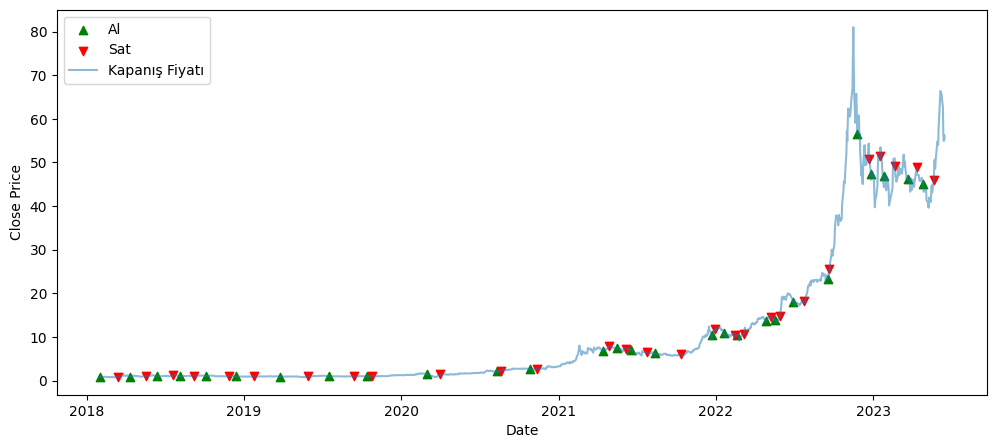

In [572]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

## Model çok sık sat tavsiyesi verdiği için karlılık açısından 2 sat tavsiyesini pas geçip her 3.sat tavsiyesinde satış yapacağız.

In [573]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2018-02-02     0.870
2018-04-12     0.892
2018-06-13     0.955
2018-08-06     1.093
2018-10-05     1.077
2018-12-13     0.955
2019-03-27     0.867
2019-07-17     1.015
2019-10-15     0.949
2020-03-02     1.421
2020-08-10     2.128
2020-10-26     2.603
2021-04-13     6.818
2021-05-17     7.535
2021-06-17     6.943
2021-08-12     6.239
2021-12-24    10.348
2022-01-19    10.913
2022-02-18    10.374
2022-04-28    13.685
2022-05-18    13.930
2022-06-29    18.000
2022-09-19    23.217
2022-11-25    56.609
2022-12-28    47.348
2023-01-27    46.957
2023-03-22    46.217
2023-04-26    44.957
Name: Al, dtype: float64

In [498]:
del al["2023-06-15"]

In [574]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)
sat


Date
2018-03-15     0.894
2018-05-18     1.073
2018-07-20     1.180
2018-09-07     1.119
2018-11-28     1.053
2019-01-24     0.989
2019-05-29     0.940
2019-09-13     0.999
2019-10-25     1.060
2020-03-31     1.413
2020-08-20     2.272
2020-11-12     2.707
2021-04-27     7.974
2021-06-07     7.343
2021-07-26     6.452
2021-10-11     6.043
2021-12-30    11.837
2022-02-15    10.391
2022-03-07    10.643
2022-05-09    14.661
2022-05-30    14.861
2022-07-25    18.252
2022-09-20    25.478
2022-12-23    50.783
2023-01-16    51.565
2023-02-21    49.087
2023-04-12    48.870
2023-05-22    46.044
Name: Sat, dtype: float64

In [464]:
del sat["2022-03-09"]

In [646]:
sat_val=sat.values
al_val=al.values


In [647]:
sat_val1=sat_val[2:27:3]

In [648]:
sat_val

array([ 0.894,  1.073,  1.18 ,  1.119,  1.053,  0.989,  0.94 ,  0.999,
        1.06 ,  1.413,  2.272,  2.707,  7.974,  7.343,  6.452,  6.043,
       11.837, 10.391, 10.643, 14.661, 14.861, 18.252, 25.478, 50.783,
       51.565, 49.087, 48.87 , 46.044])

In [649]:
al_val1=al_val[0:27:3]
al_val1

array([ 0.87 ,  1.093,  0.867,  1.421,  6.818,  6.239, 10.374, 18.   ,
       47.348])

In [650]:
res=[]

for i in range(9):
    res.append((sat_val[i]/al_val1[i]))

In [651]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.027586
1,0.981702
2,1.361015
3,0.787474
4,0.154444
5,0.158519
6,0.090611
7,0.055500
8,0.022387


In [636]:
df["Eldeki Para"]=df["Kar"]*100
df

,Kar,Eldeki Para
0,1.356322,135.632184
1,0.904849,90.484904
2,1.222607,122.260669
3,1.904996,190.499648
4,0.946319,94.631857
5,1.665491,166.549126
6,1.432524,143.252362
7,2.821278,282.127778
8,1.032145,103.214497


In [637]:
df["Son Kar"]=df["Eldeki Para"]-100

In [638]:
df["Yatırılan Para"]=[100,100,100,100,100,100,100,100,100]

In [639]:
karlilik=df["Eldeki Para"].sum()/df["Yatırılan Para"].sum()
karlilik

1.4762811384783228

In [640]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 47.628113847832275


## Her sat tavsiyesinde satmayıp 5.sat tavsiyesinde satarsak ne olur?(Yani 4 adet sat tavsiyesini pas geçersek)

In [652]:
sat_val2=sat_val[4:27:5]

In [653]:
sat_val2

array([ 1.053,  1.413,  6.452, 14.661, 51.565])

In [654]:
al_val2=al_val[0:24:5]
al_val2

array([ 0.87 ,  0.955,  2.128,  6.239, 13.93 ])

In [656]:
res1=[]

for i in range(5):
    res1.append((sat_val2[i]/al_val2[i]))

In [657]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,1.210345
1,1.479581
2,3.031955
3,2.349896
4,3.701723


In [658]:
df1["Eldeki Para"]=df1["Kar"]*100
df1 

,Kar,Eldeki Para
0,1.210345,121.034483
1,1.479581,147.958115
2,3.031955,303.195489
3,2.349896,234.989582
4,3.701723,370.172290


In [659]:
df1["Son Kar"]=df1["Eldeki Para"]-100

In [660]:
df1["Yatırılan Para"]=[100,100,100,100,100]

In [661]:
df1

,Kar,Eldeki Para,Son Kar,Yatırılan Para
0,1.210345,121.034483,21.034483,100
1,1.479581,147.958115,47.958115,100
2,3.031955,303.195489,203.195489,100
3,2.349896,234.989582,134.989582,100
4,3.701723,370.172290,270.172290,100


İlk aşamada 100 TL yatırıp 121 TL kazanırız,toplamda 500 TL yatırıp 1177 TL kazanmış oluruz.

In [662]:
karlilik=df1["Eldeki Para"].sum()/df1["Yatırılan Para"].sum()
karlilik

2.354699916697871

In [663]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 135.4699916697871
